In [ ]:
import random
import openpyxl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from google.colab import drive
import time
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt
import os
from google.colab import files
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import balanced_accuracy_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [ ]:
# Mount your Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


**Boundary** **Dataset**

In [ ]:
# Specify the path to your file in Google Drive
file_path = '/content/drive/My Drive/Boundary_Cifar10.xlsx'

In [ ]:
# Load all sheets into a dictionary of DataFrames
df = pd.read_excel(file_path)

In [ ]:
df['Label'] = df['Label'].replace('Malware', 'Boundary')

In [ ]:
df.head()

,Iteration,Trail,Top 1 Probability,Top 2 Probability,Top 1 Label,Top 2 Label,Cache Hits,Margin Loss,Noise,offset,Label
0,1.0,1,0.965761,0.034079,6,2,False,0.931682,0.429488,0.000000,Boundary
1,NaN,2,0.965761,0.034079,6,2,False,0.931682,0.427322,0.002166,Boundary
2,NaN,3,0.965761,0.034079,6,2,False,0.931682,0.424075,0.003247,Boundary
3,NaN,4,0.965761,0.034079,6,2,False,0.931682,0.419206,0.004868,Boundary
4,NaN,5,0.965761,0.034079,6,2,False,0.931682,0.411907,0.007299,Boundary


In [ ]:
df.tail()

,Iteration,Trail,Top 1 Probability,Top 2 Probability,Top 1 Label,Top 2 Label,Cache Hits,Margin Loss,Noise,offset,Label
787246,58.0,1,0.537932,0.461584,2,6,False,0.076348,0.276431,0.039142,Boundary
787247,NaN,2,0.537932,0.461584,2,6,False,0.076348,0.275037,0.001394,Boundary
787248,NaN,3,0.537932,0.461584,2,6,False,0.076348,0.272947,0.002090,Boundary
787249,NaN,4,0.537932,0.461584,2,6,False,0.076348,0.269813,0.003133,Boundary
787250,NaN,5,0.537932,0.461584,2,6,False,0.076348,0.265115,0.004698,Boundary


In [ ]:
df.shape

(787251, 11)

In [ ]:
df = df[df['Label'] != 'Benign']

In [ ]:
df.shape

(787251, 11)

**Benign dataset**

In [ ]:
# Load all sheets into a dictionary of DataFrames
dff = pd.read_excel('/content/drive/My Drive/Boundary_Cifar10_Original.xlsx')

In [ ]:
dff.shape

(9974, 7)

In [ ]:
dff.tail()

,Top 1 Probability,Top 2 Probability,Top 1 Label,Top 2 Label,Margin Loss,offset,Label
9969,0.914087,4.756780e-02,5,7,0.866519,0.479368,Benign
9970,0.999999,6.960000e-07,5,3,0.999998,0.336726,Benign
9971,1.000000,8.320000e-09,5,3,1.000000,0.150577,Benign
9972,0.856713,1.432366e-01,5,4,0.713477,0.234203,Benign
9973,0.999980,1.620000e-05,6,3,0.999964,0.302657,Benign


**NES** **Dataset**

In [ ]:
# Specify the path to your file in Google Drive
file_path = '/content/drive/My Drive/NES_Cifar10.csv'

In [ ]:
df1 = pd.read_csv(file_path)

In [ ]:
# Renaming columns
df1.rename(columns={'SortedList_First_Element': 'Top 1 Probability', 'SortedList_Second_Element': 'Top 2 Probability', 'PredictedLabel_first':'Top 1 Label', 'Predicted_Label_second':'Top 2 Label'}, inplace=True)

In [ ]:
df1['Label'] = 'NES'

In [ ]:
df1.head()

,CurrentIndex,IndexLabel,NES_Logits_True/False,Top 1 Probability,Top 2 Probability,Top 1 Label,Top 2 Label,Margin Loss,Label
0,0,,False,0.999974,0.000026,7,4,0.999949,NES
1,1,Estimate_Initial_Variance,False,0.850932,0.149067,6,2,0.701865,NES
2,,,False,0.877930,0.113648,6,2,0.764282,NES
3,,,False,0.723967,0.275976,6,2,0.447991,NES
4,,,False,0.785016,0.214981,2,6,0.570035,NES


In [ ]:
df1.shape

(469841, 9)

**Square** **Dataset**

In [ ]:
# Specify the path to your file in Google Drive
file_path = '/content/drive/My Drive/Square_Cifar10.csv'

In [ ]:
df2 = pd.read_csv(file_path)

In [ ]:
# Renaming columns
df2.rename(columns={'SortedList_First_Element': 'Top 1 Probability', 'SortedList_Second_Element': 'Top 2 Probability', 'PredictedLabel_first':'Top 1 Label', 'Predicted_Label_second':'Top 2 Label'}, inplace=True)

In [ ]:
df2['Label'] = 'Square'

In [ ]:
df2.head()

,CurrentIndex,IndexLabel,Logits_True/False,Top 1 Probability,Top 2 Probability,Top 1 Label,Top 2 Label,Margin Loss,Label
0,0,,False,0.550991,3.981260e-01,4,3,0.152865,Square
1,1,Initial_Num_Squares,False,0.997986,1.334710e-03,4,2,0.996651,Square
2,,,False,0.999999,7.967977e-07,4,3,0.999998,Square
3,,,False,0.830272,1.022182e-01,4,3,0.728054,Square
4,,,False,0.959118,4.037444e-02,4,3,0.918744,Square


In [ ]:
df2.shape

(155922, 9)

**HSJA Dataset**

In [ ]:
# Specify the path to your file in Google Drive
file_path = 'HSJA_CIFAR10.csv'

In [ ]:
df3 = pd.read_csv(file_path)

<ipython-input-27-1f5a9e5b9457>:1: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  df3 = pd.read_csv(file_path)


In [ ]:
# Renaming columns
df3.rename(columns={'SortedList_First_Element': 'Top 1 Probability', 'SortedList_Second_Element': 'Top 2 Probability', 'PredictedLabel_first':'Top 1 Label', 'Predicted_Label_second':'Top 2 Label'}, inplace=True)

In [ ]:
df3['Label'] = 'QEBA / HSJA'

In [ ]:
df3.head()

,CurrentIndex,HSJA_Logits_True/False,Top 1 Probability,Top 2 Probability,Attack_Status,Margin Loss,Label
0,0,False,0.376380,0.253102,NaN,0.123278,QEBA / HSJA
1,NaN,False,0.744554,0.160647,NaN,0.583907,QEBA / HSJA
2,NaN,False,0.970433,0.023774,NaN,0.946659,QEBA / HSJA
3,NaN,False,0.751087,0.220022,NaN,0.531065,QEBA / HSJA
4,NaN,False,0.648171,0.303700,NaN,0.344471,QEBA / HSJA


In [ ]:
df3.tail()

,CurrentIndex,HSJA_Logits_True/False,Top 1 Probability,Top 2 Probability,Attack_Status,Margin Loss,Label
6701986,NaN,False,0.408709,0.408350,NaN,0.000360,QEBA / HSJA
6701987,NaN,False,0.408591,0.408449,NaN,0.000142,QEBA / HSJA
6701988,NaN,False,0.408583,0.408468,NaN,0.000115,QEBA / HSJA
6701989,NaN,False,0.408530,0.408515,NaN,0.000014,QEBA / HSJA
6701990,NaN,False,0.408550,0.408497,NaN,0.000052,QEBA / HSJA


**QEBA Dataset**

In [ ]:
# Specify the path to your file in Google Drive
file_path = 'QEBA_cifar10.xlsx'

In [ ]:
df4 = pd.read_excel(file_path)

In [ ]:
df4.shape

(1048575, 6)

In [ ]:
# Renaming columns
df4.rename(columns={'SortedList_First_Element': 'Top 1 Probability', 'SortedList_Second_Element': 'Top 2 Probability', 'PredictedLabel_first':'Top 1 Label', 'Predicted_Label_second':'Top 2 Label'}, inplace=True)

In [ ]:
df4['Label'] = 'QEBA / HSJA'

In [ ]:
df4.head()

,CurrentIndex,QEBA_Logits_True/False,Top 1 Probability,Top 2 Probability,Attack_Status,Margin Loss,Label
0,0.0,False,0.999996,0.000004,NaN,0.999992,QEBA / HSJA
1,NaN,False,0.999936,0.000063,NaN,0.999872,QEBA / HSJA
2,NaN,False,0.943346,0.056607,NaN,0.886739,QEBA / HSJA
3,NaN,False,0.995128,0.004871,NaN,0.990257,QEBA / HSJA
4,NaN,False,0.727987,0.271991,NaN,0.455996,QEBA / HSJA


In [ ]:
df4.tail()

,CurrentIndex,QEBA_Logits_True/False,Top 1 Probability,Top 2 Probability,Attack_Status,Margin Loss,Label
1048570,NaN,False,0.991372,0.006935,NaN,0.984438,QEBA / HSJA
1048571,NaN,False,0.997313,0.001415,NaN,0.995898,QEBA / HSJA
1048572,NaN,False,0.978855,0.013895,NaN,0.964959,QEBA / HSJA
1048573,NaN,False,0.988028,0.011668,NaN,0.976360,QEBA / HSJA
1048574,NaN,False,0.709561,0.287287,NaN,0.422274,QEBA / HSJA


**Combine QEBA / HSJA**

In [ ]:
# Merging the DataFrames row-wise
df3 = pd.concat([df3, df4], axis=0)

# Resetting the index if needed
df3.reset_index(drop=True, inplace=True)

In [ ]:
df3.shape

(7750566, 8)

**SURFREE Dataset**

In [ ]:
# Specify the path to your file in Google Drive
file_path = 'SURFREE_cifar10.xlsx'

In [ ]:
df4 = pd.read_excel(file_path)

In [ ]:
# Renaming columns
df4.rename(columns={'SortedList_First_Element': 'Top 1 Probability', 'SortedList_Second_Element': 'Top 2 Probability', 'PredictedLabel_first':'Top 1 Label', 'Predicted_Label_second':'Top 2 Label'}, inplace=True)

In [ ]:
df4['Label'] = 'SURFREE'

In [ ]:
df4.head()

,Surfree_Logits_True/False,Top 1 Probability,Top 2 Probability,Attack_Status,Margin Loss,Label
0,False,0.993475,5.805205e-03,NaN,0.987670,SURFREE
1,False,0.937610,6.213383e-02,NaN,0.875476,SURFREE
2,False,0.998287,1.698936e-03,NaN,0.996588,SURFREE
3,False,0.556448,4.345525e-01,NaN,0.121896,SURFREE
4,False,0.999998,7.861221e-07,NaN,0.999997,SURFREE


In [ ]:
df4.tail()

,Surfree_Logits_True/False,Top 1 Probability,Top 2 Probability,Attack_Status,Margin Loss,Label
194329,False,0.964052,0.025270,NaN,0.938781,SURFREE
194330,False,0.788743,0.204339,NaN,0.584404,SURFREE
194331,False,0.910887,0.071277,NaN,0.839611,SURFREE
194332,False,0.964186,0.031899,NaN,0.932287,SURFREE
194333,False,0.684325,0.308581,NaN,0.375744,SURFREE


**Combine** **Datasets**

In [ ]:
# Merging the DataFrames row-wise
combined_df = pd.concat([dff, df, df1, df2, df3, df4], axis=0)

# Resetting the index if needed
combined_df.reset_index(drop=True, inplace=True)

In [ ]:
combined_df.head()

,Top 1 Probability,Top 2 Probability,Top 1 Label,Top 2 Label,Margin Loss,offset,Label,Iteration,Trail,Cache Hits,Noise,CurrentIndex,IndexLabel,NES_Logits_True/False,Logits_True/False,HSJA_Logits_True/False,Attack_Status,QEBA_Logits_True/False,Surfree_Logits_True/False
0,0.999468,4.765340e-04,0.0,4.0,0.998991,0.000000,Benign,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.994223,5.296815e-03,9.0,0.0,0.988926,0.604090,Benign,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.999783,2.152990e-04,3.0,5.0,0.999568,0.561415,Benign,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.999629,3.543440e-04,5.0,3.0,0.999275,0.683682,Benign,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.000000,2.530000e-10,1.0,9.0,1.000000,0.552765,Benign,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
combined_df.tail()

,Top 1 Probability,Top 2 Probability,Top 1 Label,Top 2 Label,Margin Loss,offset,Label,Iteration,Trail,Cache Hits,Noise,CurrentIndex,IndexLabel,NES_Logits_True/False,Logits_True/False,HSJA_Logits_True/False,Attack_Status,QEBA_Logits_True/False,Surfree_Logits_True/False
9367883,0.964052,0.025270,NaN,NaN,0.938781,NaN,SURFREE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
9367884,0.788743,0.204339,NaN,NaN,0.584404,NaN,SURFREE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
9367885,0.910887,0.071277,NaN,NaN,0.839611,NaN,SURFREE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
9367886,0.964186,0.031899,NaN,NaN,0.932287,NaN,SURFREE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
9367887,0.684325,0.308581,NaN,NaN,0.375744,NaN,SURFREE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [ ]:
combined_df.shape

(9367888, 19)

**Boundary** **Sequences**

In [ ]:
# For Label Malware
Boundary_data_sequences = []
Boundary_data_labels = []
malware_data = df[df['Label'] == 'Boundary']

# Identify unique cycles in the Iteration column
cycle_start_indices = malware_data[malware_data['Iteration'] == 1].index.tolist()

# Create sequences for each cycle
for i, start_idx in enumerate(cycle_start_indices):
    if i + 1 < len(cycle_start_indices):
        end_idx = cycle_start_indices[i + 1] - 1
    else:
        end_idx = len(malware_data) - 1

    cycle_data = malware_data.loc[start_idx:end_idx]
    cycle_sequence = cycle_data[['Margin Loss']].to_numpy()
    Boundary_data_sequences.append(cycle_sequence)
    Boundary_data_labels.append(1)  # Label for malware

In [ ]:
Boundary_data_sequences = Boundary_data_sequences[:900]

In [ ]:
len(Boundary_data_sequences)

1049

In [ ]:
Boundary_data_labels = Boundary_data_labels[:900]

In [ ]:
len(Boundary_data_labels)

1049

In [ ]:
min_length = []
for i in range(len(Boundary_data_sequences)):
  min_length.append(len(Boundary_data_sequences[i]))
print('minimum length of the Boundary sequence is:', min(min_length))
print('maximum length of the Boundary sequence is:', max(min_length))

minimum length of the Boundary sequence is: 428
maximum length of the Boundary sequence is: 810


In [ ]:
# Check for None values in benign_data_sequences
if any(seq is None for seq in Boundary_data_sequences):
    print("Found None in Boundary_data_sequences")

**Benign Sequences**

In [ ]:
# For Label Benign
benign_data_sequences = []
benign_data_labels = []
benign_data = combined_df[combined_df['Label'] == 'Benign']

# Define the target ratio
target_ratio = 1 / 1

# Calculate the number of benign sequences needed
required_benign_sequences = int(len(Boundary_data_sequences) * target_ratio)

while len(benign_data_sequences) < required_benign_sequences:
    # Shuffle the benign data before generating a new sequence
    benign_data = benign_data.sample(frac=1).reset_index(drop=True)

    seq_length = np.random.randint(500, 800)  # Random length between 500 and 800
    if len(benign_data) < seq_length:
        seq_length = len(benign_data)
    sequence = benign_data.iloc[:seq_length][['Margin Loss']].to_numpy()
    benign_data_sequences.append(sequence)
    benign_data_labels.append(0)  # Label for benign
    benign_data = benign_data.iloc[seq_length:]  # Remove the used sequence from the data

In [ ]:
len(benign_data_labels)

1049

In [ ]:
len(benign_data_sequences)

1049

**NES** **sequences**

In [ ]:
# Convert CurrentIndex to numeric, coercing errors so blanks become NaN
df1['CurrentIndex'] = pd.to_numeric(df1['CurrentIndex'], errors='coerce')

# Filter the dataframe to only include rows labeled as 'Malware'
malware_df = df1[df1['Label'] == 'NES']

# Find the indices where CurrentIndex is 0
start_indices = malware_df.index[malware_df['CurrentIndex'] == 0].tolist()

# Initialize list to hold the sequences
sequences = []
NES_data_labels = []

# Loop over the start indices to define sequences
for i, start_index in enumerate(start_indices):
    # Determine the end index (one before the next start index or end of dataframe)
    end_index = start_indices[i + 1] if i + 1 < len(start_indices) else len(malware_df)

    # Extract the sequence
    sequence = malware_df.iloc[start_index:end_index]['Margin Loss']
    sequences.append(sequence)

    NES_data_labels.append(2)

# Convert each sequence DataFrame into a list of lists (rows as lists)
NES_data_sequences = [sequence.values.tolist() for sequence in sequences]

In [ ]:
len(NES_data_labels)

841

In [ ]:
len(NES_data_sequences)

841

In [ ]:
min_length = []
for i in range(len(NES_data_sequences)):
  min_length.append(len(NES_data_sequences[i]))
print('minimum length of the NES sequence is:', min(min_length))
print('maximum length of the NES sequence is:', max(min_length))

minimum length of the NES sequence is: 452
maximum length of the NES sequence is: 3971


In [ ]:
# Check for None values in benign_data_sequences
if any(seq is None for seq in NES_data_sequences):
    print("Found None in NES_data_sequences")

**Square** **Sequences**

In [ ]:
# Convert CurrentIndex to numeric, coercing errors so blanks become NaN
df2['CurrentIndex'] = pd.to_numeric(df2['CurrentIndex'], errors='coerce')

# Filter the dataframe to only include rows labeled as 'Malware'
malware_df = df2[df2['Label'] == 'Square']

# Find the indices where CurrentIndex is 0
start_indices = malware_df.index[malware_df['CurrentIndex'] == 0].tolist()

# Initialize list to hold the sequences
sequences = []
Square_data_labels = []

# Loop over the start indices to define sequences
for i, start_index in enumerate(start_indices):
    # Determine the end index (one before the next start index or end of dataframe)
    end_index = start_indices[i + 1] if i + 1 < len(start_indices) else len(malware_df)

    # Extract the sequence
    sequence = malware_df.iloc[start_index:end_index]['Margin Loss']
    sequences.append(sequence)

    Square_data_labels.append(3)

# Convert each sequence DataFrame into a list of lists (rows as lists)
Square_data_sequences = [sequence.values.tolist() for sequence in sequences]

In [ ]:
len(Square_data_sequences)

901

In [ ]:
len(Square_data_labels)

901

In [ ]:
min_length = []
for i in range(len(Square_data_sequences)):
  min_length.append(len(Square_data_sequences[i]))
print('minimum length of the Square sequence is:', min(min_length))
print('maximum length of the Square sequence is:', max(min_length))

minimum length of the Square sequence is: 152
maximum length of the Square sequence is: 727


In [ ]:
# Check for None values in benign_data_sequences
if any(seq is None for seq in Square_data_sequences):
    print("Found None in Square_data_sequences")

**QEBA / HSJA sequences**

In [ ]:
df3.head()

,CurrentIndex,HSJA_Logits_True/False,Top 1 Probability,Top 2 Probability,Attack_Status,Margin Loss,Label,QEBA_Logits_True/False
0,0,False,0.376380,0.253102,NaN,0.123278,QEBA / HSJA,NaN
1,NaN,False,0.744554,0.160647,NaN,0.583907,QEBA / HSJA,NaN
2,NaN,False,0.970433,0.023774,NaN,0.946659,QEBA / HSJA,NaN
3,NaN,False,0.751087,0.220022,NaN,0.531065,QEBA / HSJA,NaN
4,NaN,False,0.648171,0.303700,NaN,0.344471,QEBA / HSJA,NaN


In [ ]:
# Find the indices where Attack_Status is 'ATTACK'
attack_indices = df3.index[df3['Attack_Status'] == 'ATTACK'].tolist()

# Initialize list to hold the sequences
hsja_data_sequences = []
hsja_data_labels = []

# Loop over the attack indices to define sequences
for i, attack_index in enumerate(attack_indices):
    # Determine the start index (either 0 or one after the previous attack index)
    start_index = attack_indices[i-1] + 1 if i > 0 else 0

    # Extract the sequence from start to the current attack index
    sequence = df3.iloc[start_index:attack_index]['Margin Loss']
    hsja_data_sequences.append(sequence.values.tolist())

    # Label the sequence
    hsja_data_labels.append(4)

In [ ]:
len(hsja_data_labels)

1824

In [ ]:
len(hsja_data_sequences)

1824

In [ ]:
len(hsja_data_sequences[0])

11628

In [ ]:
min_length = []
for i in range(len(hsja_data_sequences)):
  min_length.append(len(hsja_data_sequences[i]))
print('minimum length of the hsja sequence is:', min(min_length))
print('maximum length of the hsja sequence is:', max(min_length))

minimum length of the hsja sequence is: 328
maximum length of the hsja sequence is: 300683


**SURFREE Sequences**

In [ ]:
# Find the indices where Attack_Status is 'ATTACK'
attack_indices = df4.index[df4['Attack_Status'] == 'ATTACK'].tolist()

# Initialize list to hold the sequences
surfree_data_sequences = []
surfree_data_labels = []

# Loop over the attack indices to define sequences
for i, attack_index in enumerate(attack_indices):
    # Determine the start index (either 0 or one after the previous attack index)
    start_index = attack_indices[i-1] + 1 if i > 0 else 0

    # Extract the sequence from start to the current attack index
    sequence = df4.iloc[start_index:attack_index]['Margin Loss']
    surfree_data_sequences.append(sequence.values.tolist())

    # Label the sequence
    surfree_data_labels.append(5)

In [ ]:
len(surfree_data_sequences)

997

In [ ]:
len(surfree_data_labels)

997

In [ ]:
len(surfree_data_sequences[0])

128

In [ ]:
min_length = []
for i in range(len(surfree_data_sequences)):
  min_length.append(len(surfree_data_sequences[i]))
print('minimum length of the surfree sequence is:', min(min_length))
print('maximum length of the surfree sequence is:', max(min_length))

minimum length of the surfree sequence is: 112
maximum length of the surfree sequence is: 1948


**Combine** **Sequences** **and** **Labels**

In [ ]:
malware_data_sequences = benign_data_sequences + surfree_data_sequences + hsja_data_sequences + Boundary_data_sequences + NES_data_sequences + Square_data_sequences

In [ ]:
malware_data_labels = benign_data_labels + surfree_data_labels + hsja_data_labels + Boundary_data_labels + NES_data_labels + Square_data_labels

In [ ]:
len(malware_data_sequences)

6661

In [ ]:
len(malware_data_labels)

6661

In [ ]:
np.unique(malware_data_labels)

array([0, 1, 2, 3, 4, 5])

**Loop with Sequence List**

In [ ]:
sequence_list = [25,30,36,43,52,62,75,90,108,112]

In [ ]:
sequence_list

[25, 30, 36, 43, 52, 62, 75, 90, 108, 112]

In [ ]:
value = [112]

In [ ]:
train_loss_list = []
val_loss_list = []

train_acc_list = []
val_acc_list = []

test_loss_list = []
test_acc_list = []

time_list = []
scores = []

overall_acc_list = []
balanced_acc_list = []

In [ ]:
attack_type = 'Benign_Boundary_NES_Square_HSJA/QEBA_Surfree'

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 147s 996ms/step - accuracy: 0.6065 - loss: 0.9628 - val_accuracy: 0.7730 - val_loss: 0.5437
Epoch 2/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.8309 - loss: 0.4337 - val_accuracy: 0.8049 - val_loss: 0.4443
Epoch 3/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.8772 - loss: 0.3317 - val_accuracy: 0.9137 - val_loss: 0.2498
Epoch 4/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.9145 - loss: 0.2419 - val_accuracy: 0.9231 - val_loss: 0.2296
Epoch 5/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.9260 - loss: 0.2076 - val_accuracy: 0.9296 - val_loss: 0.2002
Epoch 6/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 137s 975ms/step - accuracy: 0.9354 - loss: 0.1877 - val_accuracy: 0.9325 - val_loss: 0.1866
Epoch 7/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 135s 1s/step - accuracy: 0.9279 - loss: 0.2039 - val_accuracy: 0.9118 - val_loss: 0.2242
Epoch 8/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 139s 982ms/step - accuracy: 0.9429 - loss: 

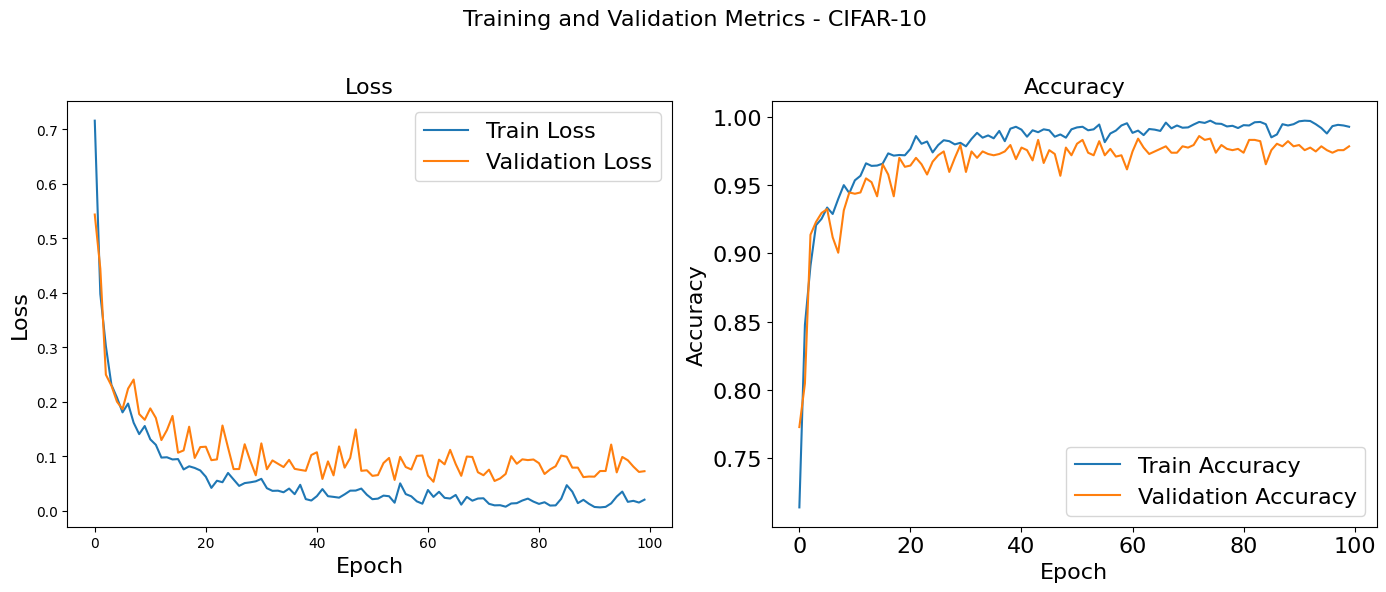

Plots saved to training_validation_metrics.pdf
42/42 ━━━━━━━━━━━━━━━━━━━━ 13s 304ms/step - accuracy: 0.9883 - loss: 0.0635
167/167 ━━━━━━━━━━━━━━━━━━━━ 47s 276ms/step
42/42 ━━━━━━━━━━━━━━━━━━━━ 12s 294ms/step


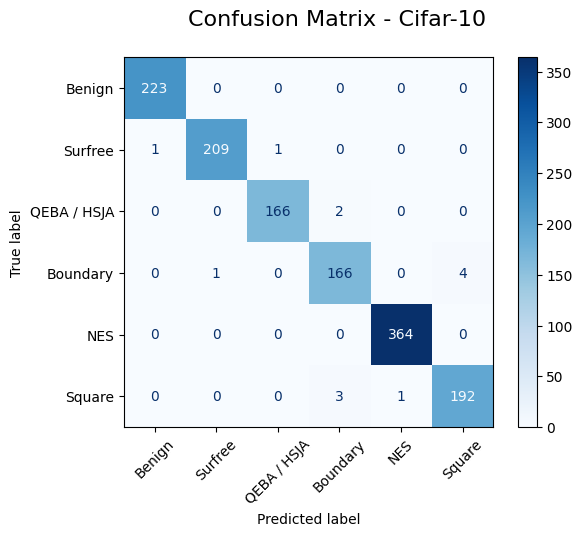

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
for i in value:

  def truncate_sequence(sequence, desired_length = i):
      if len(sequence) >= desired_length:
          # Return the first 'desired_length' elements
          return sequence[-desired_length:]
      else:
          # If the sequence is shorter, pad with zeros (or any desired padding value)
          padding = np.zeros((desired_length - len(sequence), sequence.shape[1]))
          return np.vstack((sequence, padding))

  # Apply truncation or padding to all malware and benign sequences
  all_data_sequences_i = [truncate_sequence(seq) for seq in malware_data_sequences]

  # Combine all sequences and labels
  all_data_labels = malware_data_labels

  # Convert each sequence to a NumPy array and then flatten it
  flat_data_sequences = [np.array(seq).flatten() for seq in all_data_sequences_i]

  # Pad the sequences so they all have the same length
  max_length = max(len(seq) for seq in flat_data_sequences)

  # If max_length is not even, increase it by 1 to make it even
  if max_length % 2 != 0:
      max_length += 1

  padded_data_sequences = pad_sequences(flat_data_sequences, maxlen = max_length, dtype='float32', padding='post')

  # Apply standard scaling
  scaler = StandardScaler()
  scaled_data_sequences = scaler.fit_transform(padded_data_sequences)

  # Ensure reshaping will not cause issues
  num_samples = len(scaled_data_sequences)
  num_timesteps = max_length // 2
  num_features = 2

  # Reshape back to 3D if needed (num_samples, num_timesteps, num_features)
  scaled_data_sequences = scaled_data_sequences.reshape((len(scaled_data_sequences), max_length // 2, 2))

  # Perform train-test split
  X_train, X_test, y_train, y_test = train_test_split(scaled_data_sequences, all_data_labels, test_size=0.2, random_state=42)

  # Convert labels to categorical (for multi-class classification)
  num_classes = 6
  y_train_categorical = to_categorical(y_train, num_classes=num_classes)
  y_test_categorical = to_categorical(y_test, num_classes=num_classes)

  model = tf.keras.Sequential([
      tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])),
      tf.keras.layers.Dropout(0.3),
      tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)),
      tf.keras.layers.Dropout(0.3),
      tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
      tf.keras.layers.Dropout(0.3),
      tf.keras.layers.Dense(32, activation='relu'),
      tf.keras.layers.Dense(num_classes, activation='softmax')
  ])

  # Compile the model
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

  # Define the EarlyStopping callback
  early_stopping = EarlyStopping(
      monitor='val_accuracy',  # You can also use 'accuracy' for training accuracy
      patience=100,              # Number of epochs with no improvement after which training will be stopped
      verbose=1,               # Prints a message when training stops
      restore_best_weights=True  # Restores the model weights from the epoch with the best value of the monitored quantity
  )

  # Train the model with EarlyStopping
  history = model.fit(
      X_train,
      y_train_categorical,
      validation_split=0.2,
      epochs=100,              # Set a large number of epochs, it will stop early if conditions are met
      batch_size=32,
      callbacks=[early_stopping]  # Include the EarlyStopping callback
  )


  # Assuming 'history' is the result of model.fit()

  # Extract loss and accuracy from the history object
  train_loss = history.history['loss']
  train_loss_list.append(train_loss)

  val_loss = history.history['val_loss']
  val_loss_list.append(val_loss)

  train_acc = history.history['accuracy']
  train_acc_list.append(train_acc)

  val_acc = history.history['val_accuracy']
  val_acc_list.append(val_acc)


  # Create subplots for loss and accuracy
  fig, ax = plt.subplots(1, 2, figsize=(14, 6))

  # Plot training and validation loss
  ax[0].plot(train_loss, label='Train Loss')
  ax[0].plot(val_loss, label='Validation Loss')
  ax[0].set_title('Loss', fontsize=16)
  ax[0].set_xlabel('Epoch', fontsize=16)
  ax[0].set_ylabel('Loss', fontsize=16)
  plt.xticks(fontsize=16)  # Increase font size of x-ticks
  plt.yticks(fontsize=16)
  ax[0].legend(fontsize=16)

  # Plot training and validation accuracy
  ax[1].plot(train_acc, label='Train Accuracy')
  ax[1].plot(val_acc, label='Validation Accuracy')
  ax[1].set_title('Accuracy', fontsize=16)
  ax[1].set_xlabel('Epoch', fontsize=16)
  ax[1].set_ylabel('Accuracy', fontsize=16)
  plt.xticks(fontsize=16)  # Increase font size of x-ticks
  plt.yticks(fontsize=16)
  ax[1].legend(fontsize=16)

  # Add a super title
  plt.suptitle('Training and Validation Metrics - CIFAR-10', fontsize=16)

  plt.tight_layout(rect=[0, 0, 1, 0.95])

  # Save the figure as a PDF
  pdf_filename = 'training_validation_metrics.pdf'
  with PdfPages(pdf_filename) as pdf:
      pdf.savefig(fig)

  plt.show()

  print(f"Plots saved to {pdf_filename}")

  # Evaluate the model on the test set
  test_loss, test_accuracy = model.evaluate(X_test, y_test_categorical)

  test_loss_list.append(test_loss)
  test_acc_list.append(test_accuracy)


  # Predictions
  y_train_pred = np.argmax(model.predict(X_train), axis=1)

  # Start the timer
  start_time = time.time()

  y_test_pred = np.argmax(model.predict(X_test), axis=1)

  # End the timer
  end_time = time.time()

  # Calculate the elapsed time
  elapsed_time = end_time - start_time

  time_list.append(elapsed_time)

  # Calculate training and test errors
  train_error = 1 - accuracy_score(y_train, y_train_pred)
  test_error = 1 - accuracy_score(y_test, y_test_pred)


  # Overall accuracy
  overall_accuracy = accuracy_score(y_test, y_test_pred)
  overall_acc_list.append(overall_accuracy)

  # Balanced accuracy
  balanced_accuracy = balanced_accuracy_score(y_test, y_test_pred)
  balanced_acc_list.append(balanced_accuracy)



  # Define the class labels manually
  class_labels = ['Benign', 'Surfree', 'QEBA / HSJA', 'Boundary', 'NES', 'Square']


  ### confusion matrix -- Test data


  # Compute and plot confusion matrix
  conf_matrix = confusion_matrix(y_test, y_test_pred)
  disp = ConfusionMatrixDisplay(conf_matrix, display_labels=['Benign','Surfree', 'QEBA / HSJA', 'Boundary', 'NES', 'Square'])
  disp.plot(cmap='Blues', xticks_rotation=45)
  plt.suptitle('Confusion Matrix - Cifar-10', fontsize=16)
  plt.savefig("confusion_matrix_multiclass_cifar_10.png", bbox_inches='tight', dpi=1000)
  plt.show()



  ### classification report
  # Define a directory where you want to save the reports
  output_dir = './output_reports'  # Create a folder for saving reports if it doesn't exist

  # Ensure the directory exists
  os.makedirs(output_dir, exist_ok=True)

  # Generate classification report
  report = classification_report(y_test, y_test_pred, target_names=class_labels)

  # Construct the file path
  report_filename = f'{output_dir}/Classification_Report_last_{i}.txt'

  # Save the classification report to a text file
  with open(report_filename, 'w') as file:
      file.write(f"Classification Report:\n{report}")

  # Download the file to your local machine
  files.download(report_filename)

  # Generate the classification report as a dictionary
  report_dict = classification_report(y_test, y_test_pred, target_names=class_labels, output_dict=True)

  # Extract the macro-average F1 score
  macro_avg_f1_score = report_dict['macro avg']['f1-score']

  scores.append(macro_avg_f1_score)